In [2]:
# Define the base path where the files are located
base_path = '/Users/jichanglong/Desktop/hssp_new/comparisonData/True_fl/purchase/'

# Prepare to store the filtered data from all files
all_filtered_data = []

# Loop through each file from docu_1.txt to docu_30.txt
for i in range(1, 48):
    filename = f'{base_path}docu_ns_{i}.txt'
    
    with open(filename, 'r') as file:
        content = file.read()

    # Split the text into lines
    lines = content.strip().split('\n')

    # Parse each line into a dictionary
    data = []
    for line in lines:
        if not line.strip():
            continue

        parts = line.split(', ')
        entry = {}
        for part in parts:
            key, value = part.split(': ', 1)

            # Set 'Time', 'NFound', and 'Coef' as None if 'Error' is not '0'
            if key == 'Error' and value != '0':
                entry['Time'] = None
                entry['NFound'] = None
                entry['Coef'] = None

            entry[key] = value if key not in ['Time', 'NFound', 'Coef'] else entry.get(key, value)

        data.append(entry)

    # Filter the data for entries where 'Error' is '0'
    filtered_data = [entry for entry in data if entry['Error'] == '0']
    
    # Append the filtered data for this file to the list
    all_filtered_data.append(filtered_data)

# Optionally, you can print or further process all_filtered_data
# For example, to print the filtered data from each file:
# for index, file_data in enumerate(all_filtered_data, 1):
#     print(f"Filtered data from docu_{index}.txt:")
#     for entry in file_data:
#         print(entry)

        
from collections import defaultdict
import json

# This structure will store the total time and count for each (Round, Attack Type)
stats = defaultdict(lambda: defaultdict(lambda: {'total_time': 0.0, 'count': 0}))

# Loop through all the filtered data from each file
for file_data in all_filtered_data:
    for entry in file_data:
        if entry['Time'] is not None:  # Ensure we only consider entries with a valid time
            round_attack_key = (entry['Round'], entry['Attack Type'])
            # Explicitly check and initialize if necessary
            if round_attack_key not in stats:
                stats[round_attack_key] = {'total_time': 0.0, 'count': 0}
            stats[round_attack_key]['total_time'] += float(entry['Time'])
            stats[round_attack_key]['count'] += 1

# Calculate the averages
averages = {}
for (round_num, attack_type), data in stats.items():
    if data['count'] > 0:  # Avoid division by zero
        average_time = data['total_time'] / data['count']
        averages[(round_num, attack_type)] = average_time

# Print the average times for each Round and Attack Type
for (round_num, attack_type), avg_time in sorted(averages.items()):
    print(f"Round {round_num}, Attack Type {attack_type}: Average Time = {avg_time:.4f}")

# Optionally, convert the averages dictionary to a more structured JSON for easier handling or export
json_output = json.dumps([{**{'Round': k[0], 'Attack Type': k[1], 'Average Time': v}} for k, v in averages.items()], indent=4)
print(json_output)

data = json.loads(json_output)

num = 49
# Initialize arrays to hold the average times for each attack type
ns_times = [None] * num
multi_times = [None] * num
stat_times = [None] * num

# Populate the arrays
for item in data:
    round_index = int(item['Round']) - 1  # Convert round number to 0-based index
    if item['Attack Type'] == 'NS Attack':
        ns_times[round_index] = item['Average Time']
    elif item['Attack Type'] == 'Multi Attack':
        multi_times[round_index] = item['Average Time']
    elif item['Attack Type'] == 'Statistical Attack':
        stat_times[round_index] = item['Average Time']



Round 1, Attack Type NS Attack: Average Time = 0.0294
Round 12, Attack Type NS Attack: Average Time = 0.7774
Round 15, Attack Type NS Attack: Average Time = 1.4158
Round 18, Attack Type NS Attack: Average Time = 2.4131
Round 21, Attack Type NS Attack: Average Time = 3.7898
Round 24, Attack Type NS Attack: Average Time = 5.6816
Round 27, Attack Type NS Attack: Average Time = 8.0841
Round 3, Attack Type NS Attack: Average Time = 0.0390
Round 30, Attack Type NS Attack: Average Time = 11.1171
Round 33, Attack Type NS Attack: Average Time = 14.8881
Round 36, Attack Type NS Attack: Average Time = 19.9727
Round 39, Attack Type NS Attack: Average Time = 24.8581
Round 42, Attack Type NS Attack: Average Time = 32.2013
Round 45, Attack Type NS Attack: Average Time = 41.0855
Round 49, Attack Type NS Attack: Average Time = 53.9317
Round 6, Attack Type NS Attack: Average Time = 0.1405
Round 9, Attack Type NS Attack: Average Time = 0.3694
[
    {
        "Round": "3",
        "Attack Type": "NS Attac

In [4]:
print(ns_times)
print(len(ns_times))

[0.029427854026236187, None, 0.03902371724446615, None, None, 0.1404997706413269, None, None, 0.3693989024442785, None, None, 0.7773538344615215, None, None, 1.4157961300441197, None, None, 2.4130924729739918, None, None, 3.7897769059890356, None, None, 5.681585211502878, None, None, 8.084085928069221, None, None, 11.117112526526817, None, None, 14.888140562418345, None, None, 19.9726505279541, None, None, 24.858136697819358, None, None, 32.201258469850586, None, None, 41.08547261953354, None, None, None, 53.93166680563064]
49


In [6]:
ns = [i for i in ns_times if i !=None]
len(ns)

17

In [9]:
ns = [i for i in ns_times if i !=None]
x_values = [10,40,70,100,130,160,190,220,250,280,310,340,370,400,430,460, 500]


[0.029427854026236187, 0.03902371724446615, 0.1404997706413269, 0.3693989024442785, 0.7773538344615215, 1.4157961300441197, 2.4130924729739918, 3.7897769059890356, 5.681585211502878, 8.084085928069221, 11.117112526526817, 14.888140562418345, 19.9726505279541, 24.858136697819358, 32.201258469850586, 41.08547261953354, 53.93166680563064]


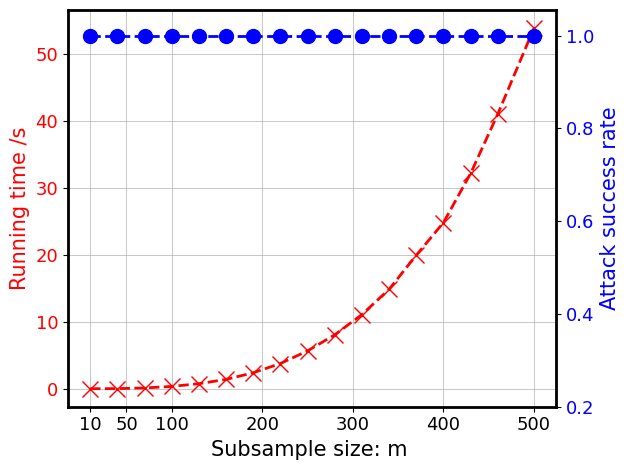

In [11]:
#multi

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()  # 创建一个figure和一个axes

x_values = [i*35+10 for i in range(15)]

index = [i//10-1 for i in x_values]
ns_coef = [1 for i in range(17)]

print(ns)
x_values_success = [i*30+10 for i in range(17)]
x_values_success[-1] = 500

ns = [i for i in ns_times if i !=None]
x_values = [10,40,70,100,130,160,190,220,250,280,310,340,370,400,430,460, 500]

marker_size = 11
# Plot lines with the new styles and markers
#ax.plot(x_values, ns, label='NS attack', color='green', linestyle='--', marker='*', linewidth=2,markersize=marker_size)
# ax.plot(x_values, multi, label='Multivariate attack', color='blue', linestyle='--', marker='o', linewidth=2,markersize=marker_size)
# ax.plot(x_values, stat, label='Statistical attack', color='red', linestyle='--', marker='x', linewidth=2,markersize=marker_size)

# ax.plot(x_values_success,stat_nfound, label='Statistical attack Nfound', color='red', linestyle='--',  linewidth=2)

# 绘制第一条线，使用ax1，这将使用左边的y轴
ax1.plot(x_values, ns, label='Multivariate attack', color='red', linestyle='--', marker='x', linewidth=2, markersize=marker_size)
ax1.set_xlabel('X values')
ax1.set_ylabel('multi attack values', color='red')
ax1.tick_params(axis='y', labelcolor='red')
# 使用twinx创建第二个axes，共享相同的x轴
ax2 = ax1.twinx()  
#ax2.plot(x_values_success, stat_nfound, label='Statistical attack Nfound', color='blue', linestyle='--', linewidth=2)
ax2.plot(x_values_success, ns_coef, label='Secrets', color='blue', linestyle='--',marker='o', linewidth=2, markersize=marker_size-1)

fontsize = 15
ax2.set_ylabel('Attack success rate', color='blue',fontsize=fontsize)
ax2.tick_params(axis='y', labelcolor='blue')

# Add grid lines
ax1.grid(True, which='both', linestyle='-', linewidth=0.5)
for spine in ax1.spines.values():
    spine.set_linewidth(2)
# Set axis labels
ax1.set_xlabel('Subsample size: m ', fontsize=fontsize)
ax1.set_ylabel('Running time /s', fontsize=fontsize)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# 合并图例句柄和标签
handles = handles1 + handles2
labels = labels1 + labels2

ax1.set_xticks([10, 50,100,200,300,400,500])
ax2.set_yticks([0.2,0.4,0.6,0.8,1.0])
new_y_ticks = ax2.get_yticks()
if new_y_ticks[0] == 0:
    new_y_ticks[0] = 0.05  # 把0刻度稍微移动上去

ax2.set_yticks(new_y_ticks)
ax2.set_yticklabels([f"{ytick:.1f}" if ytick != 0.05 else "0" for ytick in new_y_ticks])


ax1.tick_params(axis='both', labelsize=13)
ax2.tick_params(axis='both', labelsize=13)
plt.tight_layout()

# 保存为PDF格式
plt.savefig('./figure/true/purchase_NS.pdf', bbox_inches='tight')

# 保存为PNG格式
plt.savefig('./figure/true/purchase_NS.png', bbox_inches='tight')

plt.show()
